# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

In [6]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,2016.000000,2016.00000,1848.000000,1848.000000,1840.000000,1763.000000,1848.000000
mean,2011.500000,201156.50000,776.984848,776.984848,5.241538,1.897357,777.310065
std,6.923904,692.39901,1176.030443,1176.030443,40.926314,31.287810,1164.856446
min,2000.000000,200001.00000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.750000,200578.75000,38.000000,38.000000,-15.540000,-13.380000,40.000000
50%,2011.500000,201156.50000,358.500000,358.500000,0.000000,-1.130000,421.000000
75%,2017.250000,201734.25000,811.000000,811.000000,18.712500,11.485000,814.250000
max,2023.000000,202312.00000,4763.000000,4763.000000,600.000000,425.000000,3977.000000


In [8]:
df.isna().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              168
VORJAHRESWERT                     168
VERAEND_VORMONAT_PROZENT          176
VERAEND_VORJAHRESMONAT_PROZENT    253
ZWOELF_MONATE_MITTELWERT          168
dtype: int64

In [9]:
#Imortamt columns have no missing values

In [10]:

pd.set_option('display.max_rows', None)

In [11]:
duplicates = df.duplicated(subset=['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT'])

In [12]:
duplicates.sum()

0

In [13]:
df['MONAT'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [14]:
df.set_index(df['MONAT'], inplace=True)

In [15]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
MONAT,,,,,,,,,
2023-01-01,Alkoholunfälle,insgesamt,2023,2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-02-01,Alkoholunfälle,insgesamt,2023,2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,Alkoholunfälle,insgesamt,2023,2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,Alkoholunfälle,insgesamt,2023,2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,Alkoholunfälle,insgesamt,2023,2023-05-01,NaN,NaN,NaN,NaN,NaN


In [16]:
df.drop('MONAT', axis=1, inplace=True)

In [17]:
pivot_Wert = df[df['JAHR']<=2020].pivot_table(index='MONAT', columns=['MONATSZAHL', 'AUSPRAEGUNG'], values='WERT')

In [18]:
pivot_Wert.columns = ['_'.join(col).strip() for col in pivot_Wert.columns.values]

In [19]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

#Data Visualisation

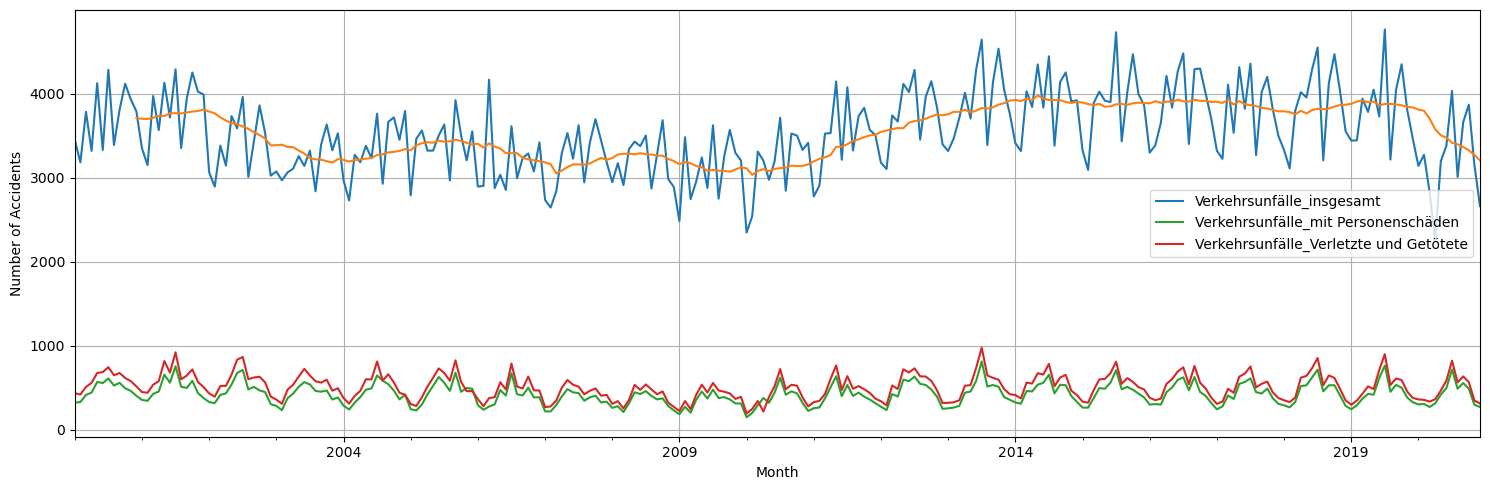

In [20]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_insgesamt'].rolling(window=12).mean().plot(figsize=(15, 5), legend=False)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [21]:
#Number of total accidents fluctuates between 3000 and 4000 (the rolling mean) accidents per month with a tendency to fall after the pandemic started.

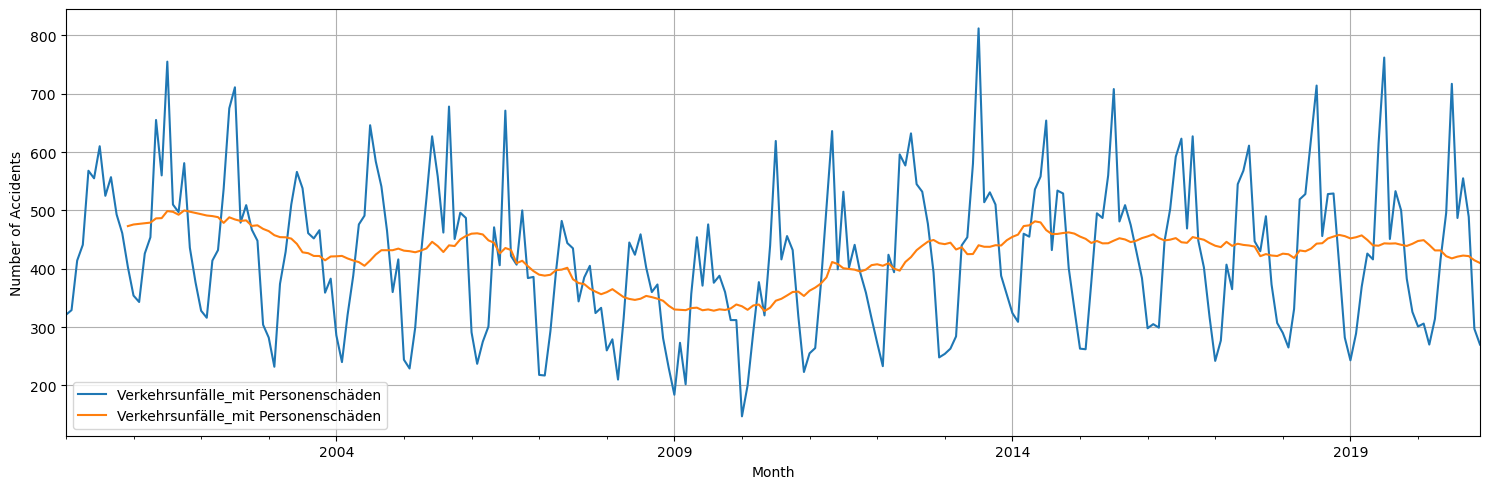

In [22]:
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

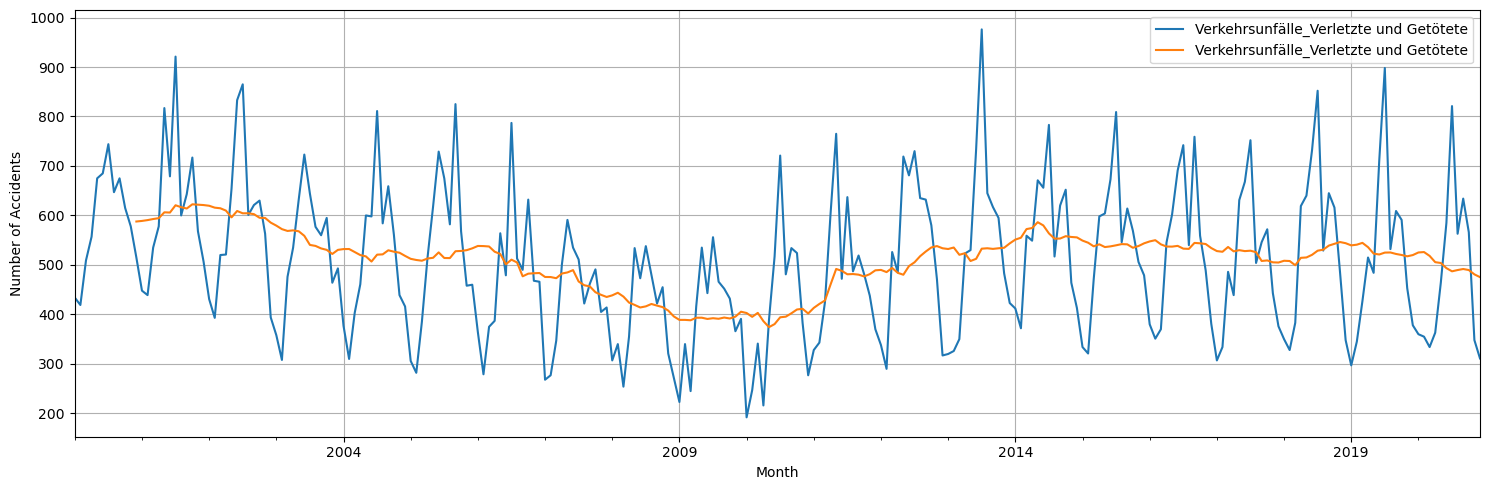

In [23]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [24]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].corr(pivot_Wert['Verkehrsunfälle_mit Personenschäden'])

0.9823936533949001

In [25]:
#I might be able to drop one  of both since they do not contain any new information

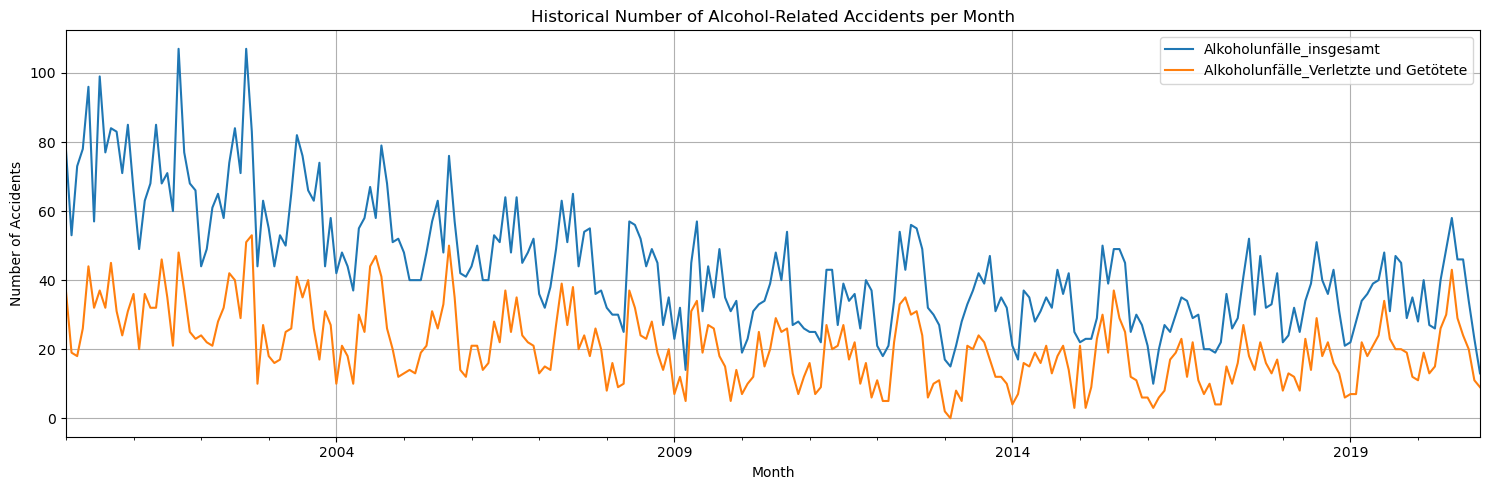

In [26]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.title('Historical Number of Alcohol-Related Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

<Axes: xlabel='MONAT'>

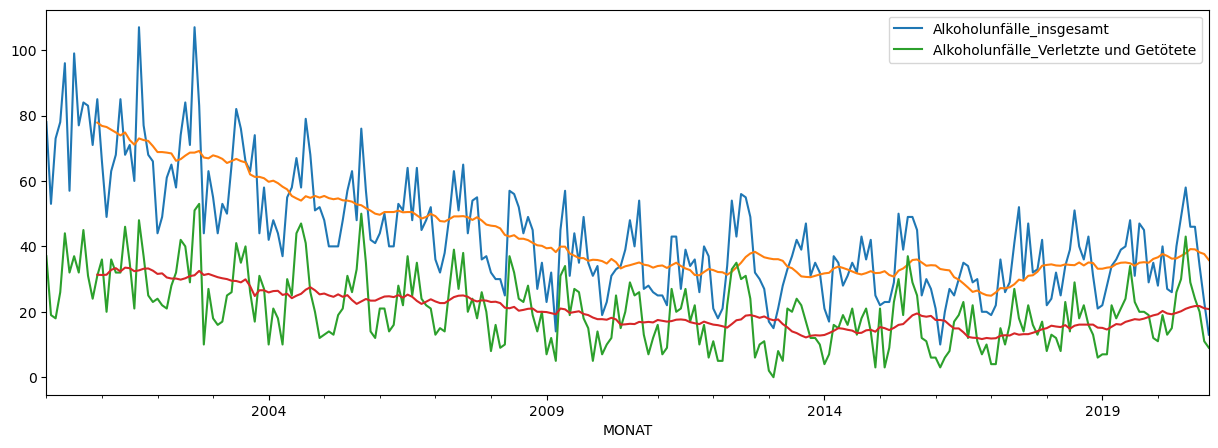

In [27]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)

<Axes: xlabel='MONAT'>

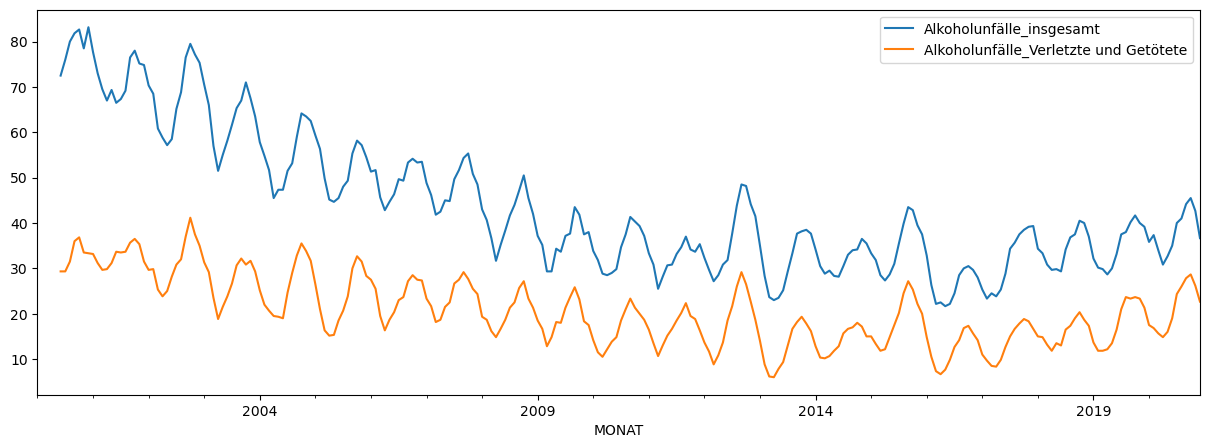

In [28]:
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

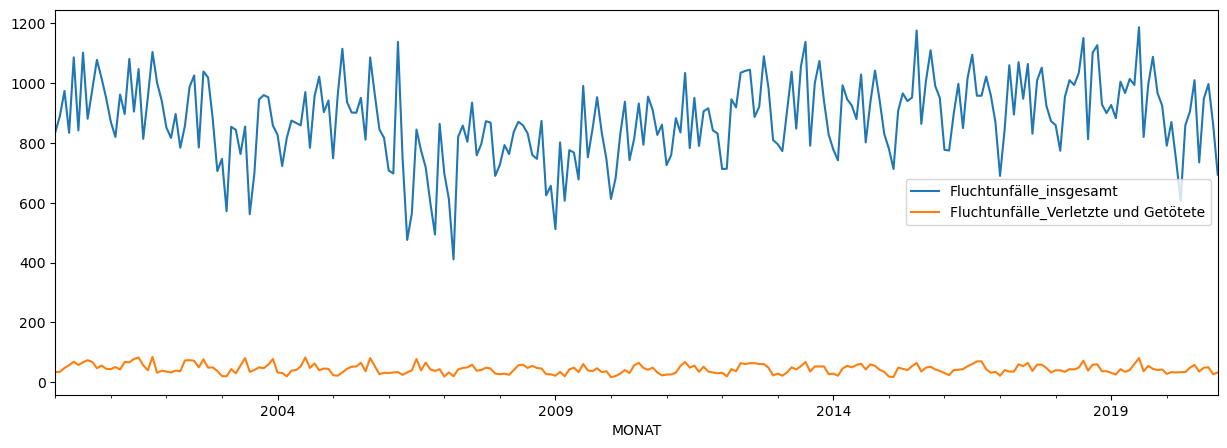

In [29]:
pivot_Wert['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Fluchtunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

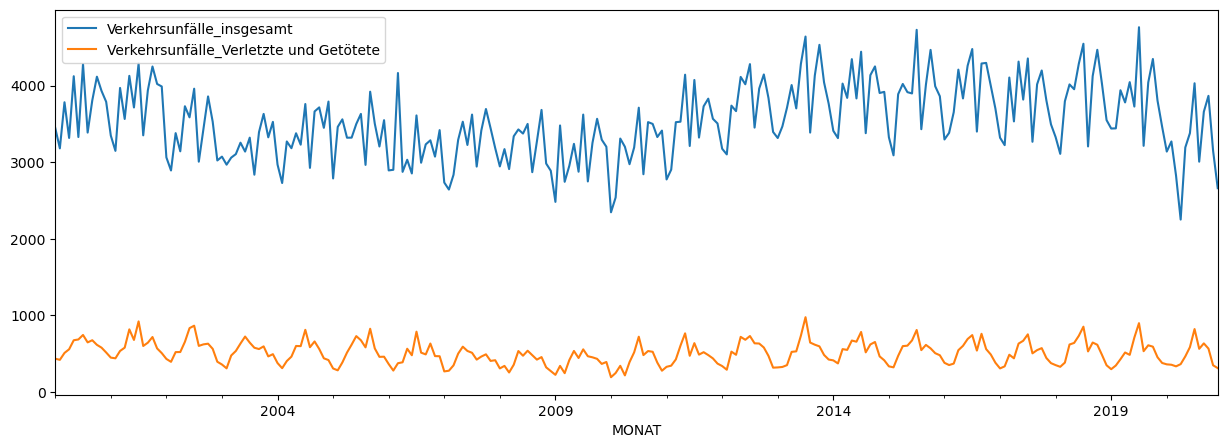

In [30]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

C:\Users\l_san\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


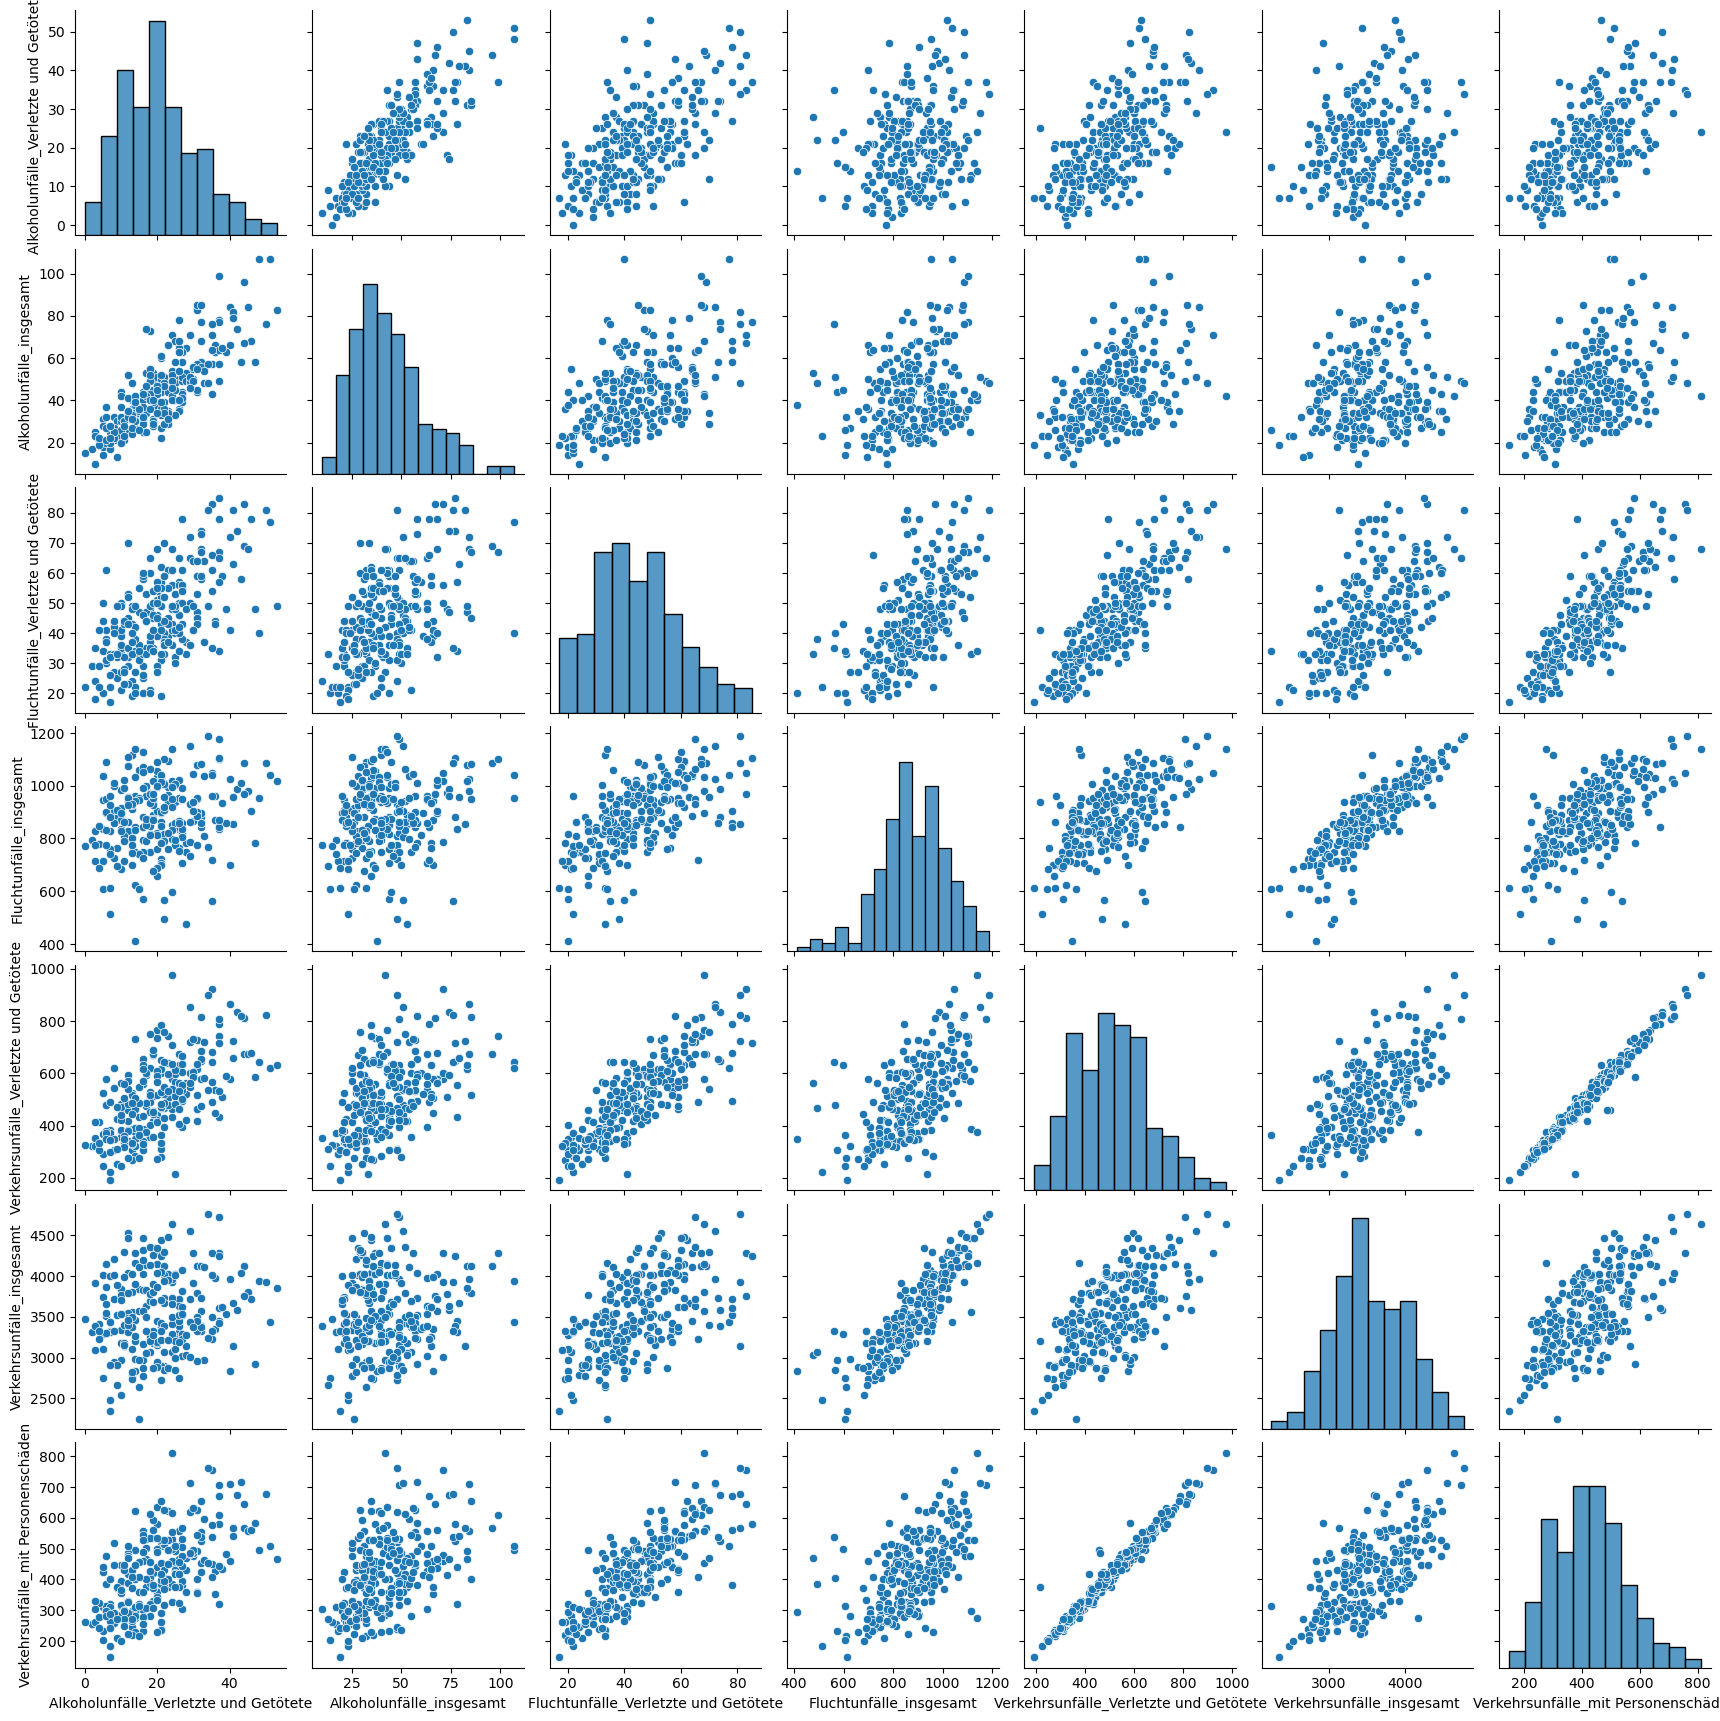

In [31]:
sns.pairplot(pivot_Wert, diag_kind='hist')

In [32]:
pivot_Wert.corr()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
Alkoholunfälle_Verletzte und Getötete,1.000000,0.827854,0.615693,0.226250,0.623204,0.148816,0.605607
Alkoholunfälle_insgesamt,0.827854,1.000000,0.535236,0.231376,0.529470,0.141663,0.487756
Fluchtunfälle_Verletzte und Getötete,0.615693,0.535236,1.000000,0.592448,0.825541,0.557021,0.818332
Fluchtunfälle_insgesamt,0.226250,0.231376,0.592448,1.000000,0.605159,0.861219,0.604825
Verkehrsunfälle_Verletzte und Getötete,0.623204,0.529470,0.825541,0.605159,1.000000,0.661860,0.982394
Verkehrsunfälle_insgesamt,0.148816,0.141663,0.557021,0.861219,0.661860,1.000000,0.657163
Verkehrsunfälle_mit Personenschäden,0.605607,0.487756,0.818332,0.604825,0.982394,0.657163,1.000000


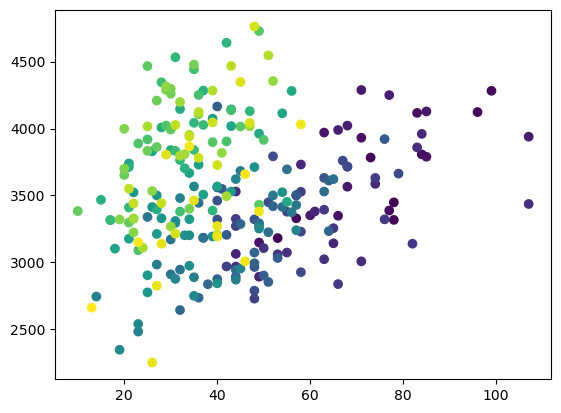

In [33]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Verkehrsunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

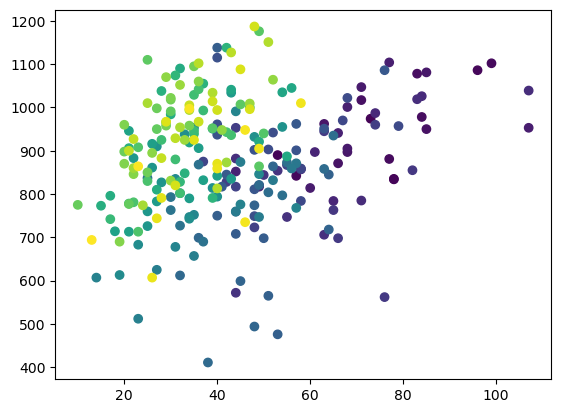

In [34]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [35]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.14166256413921607

In [36]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Fluchtunfälle_insgesamt'])

0.2313758392572978

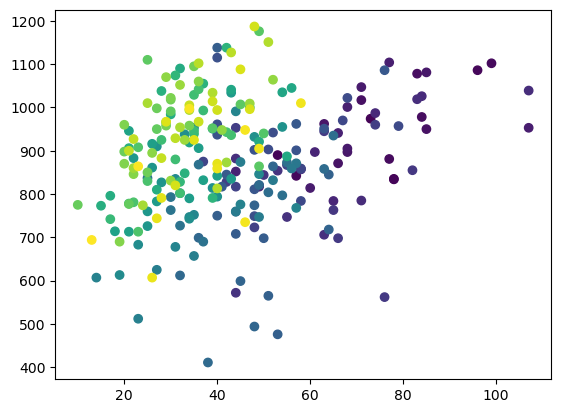

In [37]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [38]:
pivot_Wert['Fluchtunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.8612186308861733

In [39]:
pivot_Wert.groupby(pivot_Wert.index.year).sum()[['Alkoholunfälle_insgesamt', 'Verkehrsunfälle_Verletzte und Getötete', 'Fluchtunfälle_Verletzte und Getötete']]

,Alkoholunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Fluchtunfälle_Verletzte und Getötete
MONAT,,,
2000,934.0,7053.0,658.0
2001,848.0,7452.0,687.0
2002,803.0,7026.0,628.0
2003,730.0,6365.0,562.0
2004,659.0,6219.0,542.0
2005,600.0,6402.0,525.0
2006,599.0,5804.0,505.0
2007,560.0,5223.0,476.0
2008,482.0,4751.0,489.0


In [40]:
pivot_pct = pd.DataFrame()

In [41]:
pivot_pct.index= pivot_Wert.index

In [42]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

In [43]:
pivot_pct['Alkoholunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Alkoholunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [44]:
pivot_pct['Alkoholunfälle_insgesamt'] = np.round(pivot_Wert['Alkoholunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, 'Total number of alcohol related accidents in relation to total number accidents')

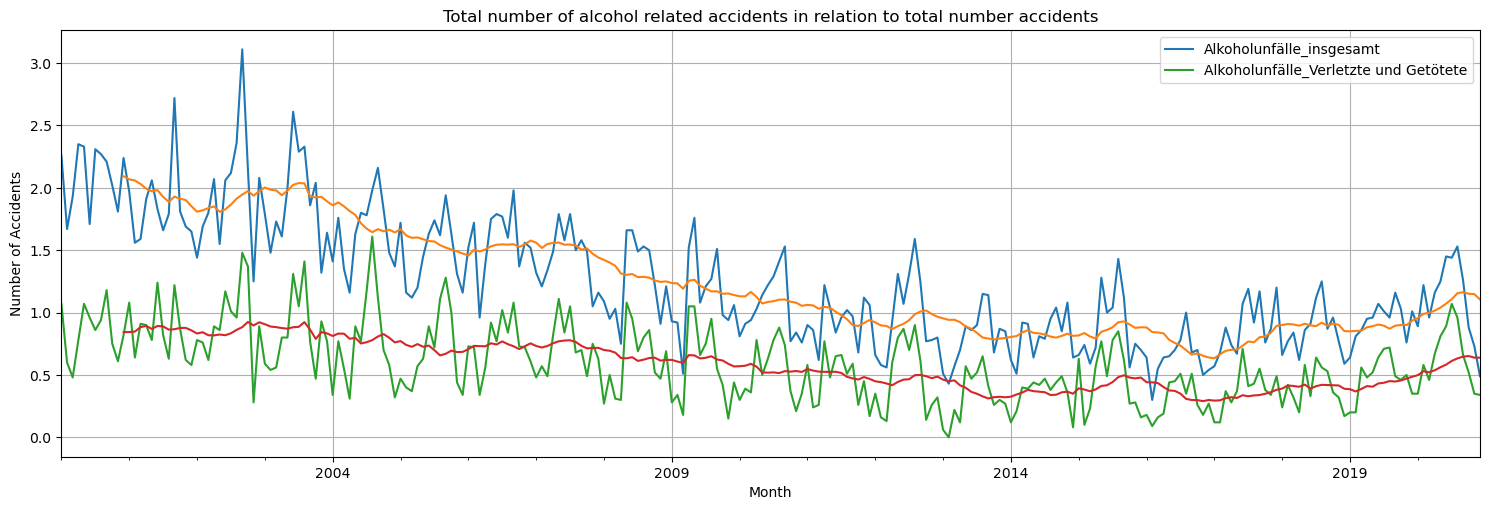

In [45]:
pivot_pct['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.title('Total number of alcohol related accidents in relation to total number accidents')

In [46]:
pivot_pct['Fluchtunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Fluchtunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [47]:
pivot_pct['Fluchtunfälle_insgesamt'] = np.round(pivot_Wert['Fluchtunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, '')

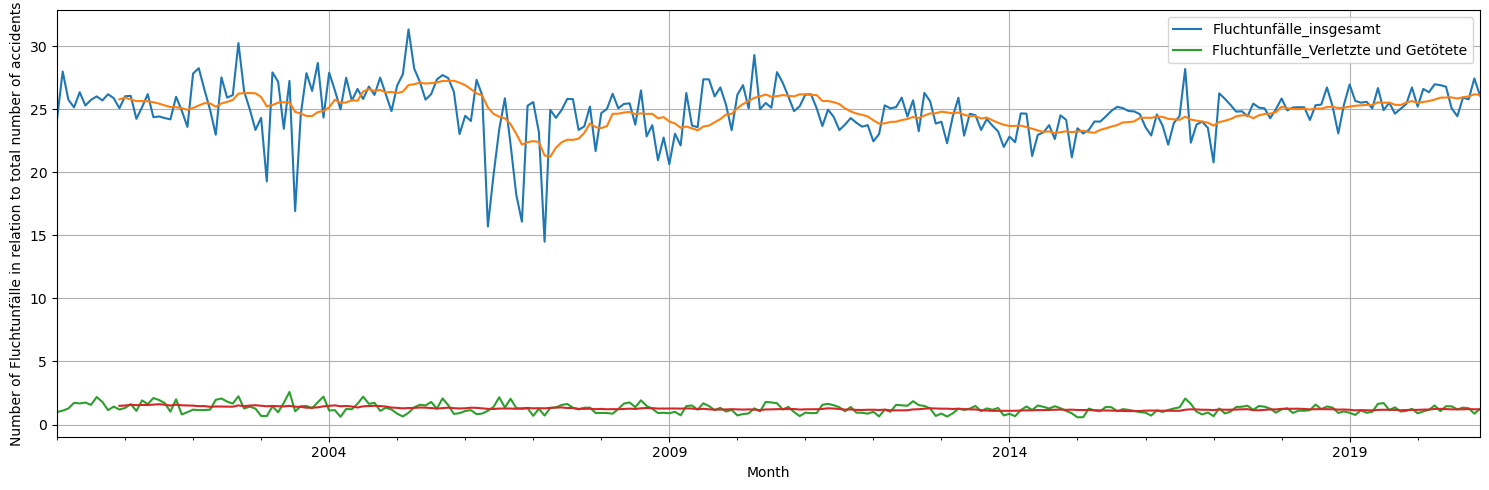

In [48]:
pivot_pct['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Fluchtunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Fluchtunfälle in relation to total number of accidents')
plt.grid(True)
plt.tight_layout()
plt.title('')

In [49]:
pivot_Wert.describe()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,20.698413,43.753968,44.888889,879.428571,511.531746,3537.198413,424.547619
std,10.671308,18.069448,14.993078,135.216334,148.671149,479.649632,125.317357
min,0.000000,10.000000,17.000000,411.000000,192.000000,2251.000000,147.000000
25%,12.750000,30.750000,34.000000,793.750000,390.500000,3205.750000,320.750000
50%,20.000000,40.000000,43.000000,877.500000,508.000000,3487.000000,423.000000
75%,27.000000,53.250000,55.000000,966.250000,610.250000,3906.750000,506.000000
max,53.000000,107.000000,85.000000,1187.000000,976.000000,4763.000000,812.000000


<Axes: >

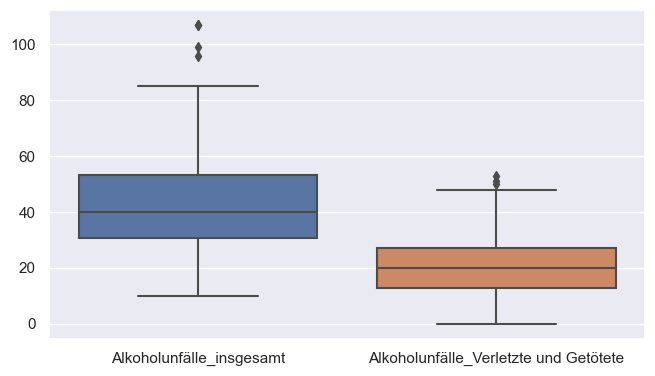

In [50]:
sns.set(rc={'figure.figsize':(7.7,4.27)})
sns.boxplot(data=pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']])


In [51]:
pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']].skew()

Alkoholunfälle_insgesamt                 0.878446
Alkoholunfälle_Verletzte und Getötete    0.565813
dtype: float64

In [52]:
pivot_Wert['Alkoholunfälle_insgesamt_log'] = np.log1p(pivot_Wert['Alkoholunfälle_insgesamt'])

In [53]:
pivot_Wert['Alkoholunfälle_insgesamt_log'].skew()

-0.16757555309036612

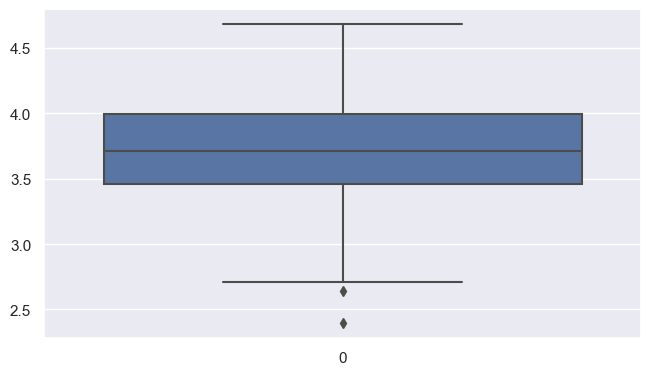

In [54]:
sns.boxplot(data=pivot_Wert['Alkoholunfälle_insgesamt_log'])
sns.set(rc={'figure.figsize':(1.7,2.27)})

In [55]:
#The distribution had a moderate right skew, after transformation skewness is close to 0. Data is now more symmetric, close to a normal distribution.

In [56]:
pivot_Wert['Alkoholunfälle_Verletzte und Getötete_log'] = np.log1p(pivot_Wert['Alkoholunfälle_Verletzte und Getötete'])

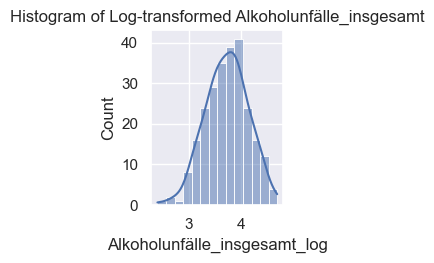

In [57]:
sns.histplot(pivot_Wert['Alkoholunfälle_insgesamt_log'], kde=True).set(title='Histogram of Log-transformed Alkoholunfälle_insgesamt')
sns.set(rc={'figure.figsize':(5.7,8.27)})

In [58]:
def percentage_change(values):
  previous_values = values[:-1]
  last_value= values[-1]

  percent_change = (last_value - np.mean(previous_values))*100/np.mean(previous_values)
  return percent_change

In [59]:
pivot_pct['Alkoholunfälle_deviation_from_mean']= pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=20).aggregate(percentage_change)

Text(0.5, 1.0, '% change over time ')

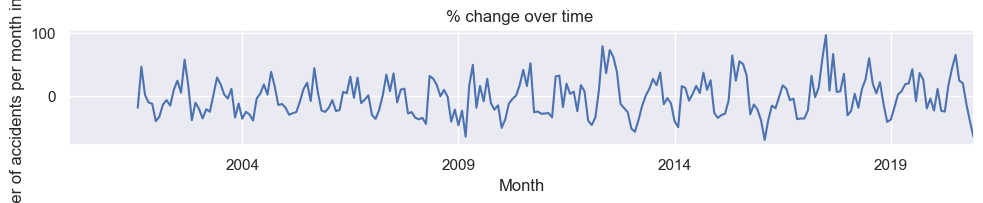

In [60]:
pivot_pct['Alkoholunfälle_deviation_from_mean'].plot(figsize=(10,2))
plt.xlabel('Month')
plt.ylabel('Percentage change of total number of accidents per month in relation to mean (20 month window)')
plt.grid(True)
plt.tight_layout()
plt.title('% change over time ')

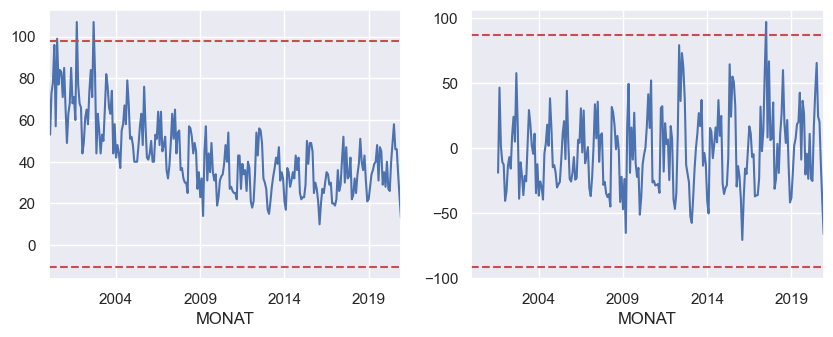

In [61]:
fix, axs= plt.subplots(1,2, figsize=(10,3.5))
for data, ax in zip([pivot_Wert['Alkoholunfälle_insgesamt'],pivot_pct['Alkoholunfälle_deviation_from_mean']], axs):
  this_mean= data.mean()
  this_std= data.std()

  data.plot(ax=ax)
  ax.axhline(this_mean + this_std *3, ls='--', c='r')
  ax.axhline(this_mean - this_std *3, ls='--', c='r')

## Preprocessing

In [62]:
df_train = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['JAHR'] <= 2020)]

In [63]:
df_test = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['JAHR'] == 2021)]

In [64]:
df_train.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
MONAT,,,,,,,,
2020-01-01,Alkoholunfälle,insgesamt,2020,28.0,22.0,-20.00,27.27,37.0
2020-02-01,Alkoholunfälle,insgesamt,2020,40.0,28.0,42.86,42.86,38.0
2020-03-01,Alkoholunfälle,insgesamt,2020,27.0,34.0,-32.50,-20.59,37.0
2020-04-01,Alkoholunfälle,insgesamt,2020,26.0,36.0,-3.70,-27.78,36.0
2020-05-01,Alkoholunfälle,insgesamt,2020,40.0,39.0,53.85,2.56,36.0


In [65]:
df_train.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [66]:
df_train = df_train.drop(['MONATSZAHL', 'AUSPRAEGUNG','JAHR', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'], axis=1)

In [67]:
df_test = df_test.drop(['MONATSZAHL', 'AUSPRAEGUNG','JAHR', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'], axis=1)

In [68]:
df_train.head()

,WERT
MONAT,
2020-01-01,28.0
2020-02-01,40.0
2020-03-01,27.0
2020-04-01,26.0
2020-05-01,40.0


In [69]:
df_train.sort_index(inplace=True)

In [70]:
df_test.sort_index(inplace=True)

## SARIMA Model Implementation

In [188]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [189]:
results= adfuller(df_train)

In [190]:
results

(-2.778474040626489,
 0.06141499421706842,
 13,
 238,
 {'1%': -3.458128284586202,
  '5%': -2.873761835239286,
  '10%': -2.5732834559706235},
 1695.196302896559)

In [191]:
df_diff= df_train.diff().dropna()

In [192]:
results2= adfuller(df_diff)

In [193]:
results2

(-4.549297016362372,
 0.00016001189638459608,
 16,
 234,
 {'1%': -3.4586084859607156,
  '5%': -2.873972159235721,
  '10%': -2.57339565928848},
 1695.0474760822262)

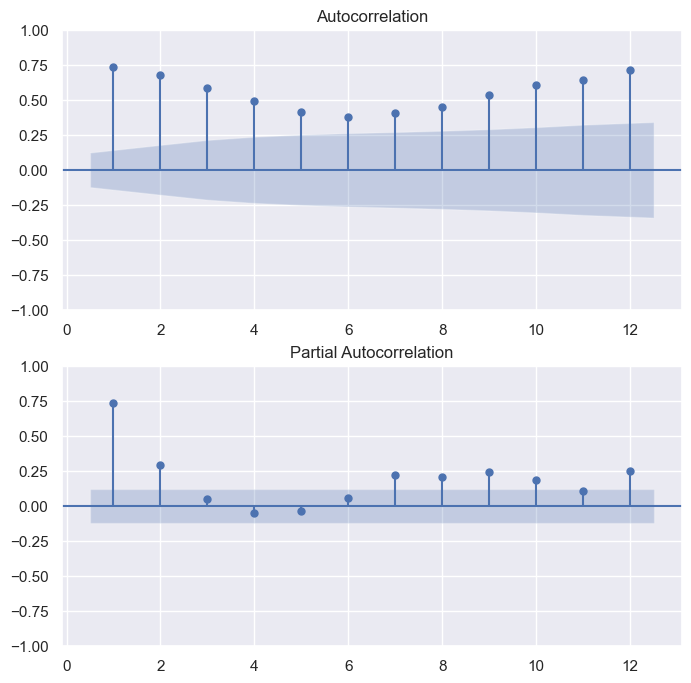

In [194]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_train, ax=ax1, lags=12, zero=False)
plot_pacf(df_train, ax=ax2, lags=12, zero=False)
plt.show()

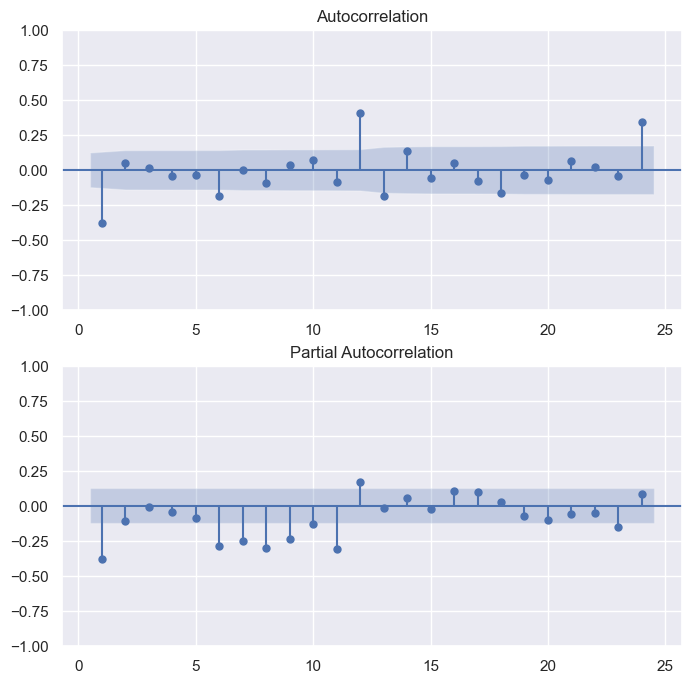

In [195]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_diff, ax=ax1, lags=24, zero=False)
plot_pacf(df_diff, ax=ax2, lags=24, zero=False)
plt.show()

In [196]:
decomp_res= seasonal_decompose(df_train, period= 14)

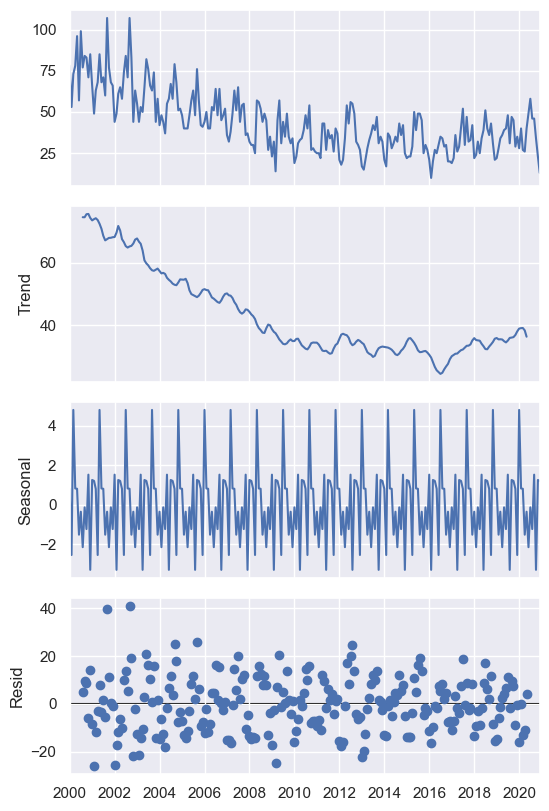

In [197]:
decomp_res.plot()
plt.show()

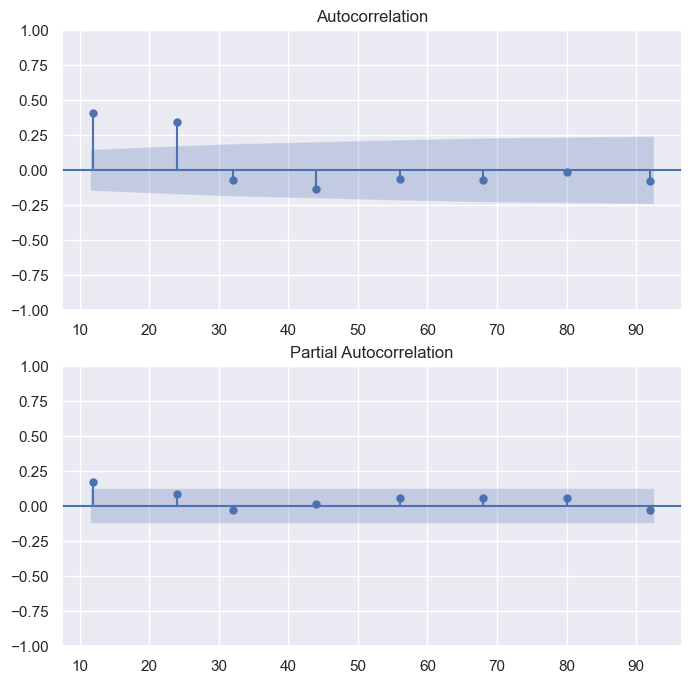

In [198]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(df_diff, ax=ax1, lags=[12,24,32,44,56,68,80,92], zero=False)
plot_pacf(df_diff, ax=ax2, lags=[12,24,32,44,56,68,80,92], zero=False)
plt.show()

In [199]:
results= pm.auto_arima(df_train, d=1, start_p=1, start_1=1, max_p=5, max_q=5, seasonal=True, m=12, D=1, start_P=1, start_Q=1,max_P=5, max_Q=5, information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1718.496, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1914.265, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1817.563, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1716.584, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1809.685, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1717.913, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1717.884, Time=0.54 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1749.351, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1719.882, Time=0.84 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1827.466, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1716.101, Time=0.38 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1803.399, Time=0.16 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1717.624, Time=0.64 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1717.593, Time=0.91 sec
 ARIMA(1,1,1)(1,1,0

In [200]:
np.mean(np.absolute(results.resid()))

7.65973119489923

In [201]:
results2= pm.auto_arima(df_train, d=0, start_p=1, start_1=1, max_p=3, max_q=3, seasonal=True, m=12, D=1, start_P=1, start_Q=1,max_P=3, max_Q=3, information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1725.424, Time=2.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1817.937, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1761.847, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1755.899, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1825.190, Time=0.03 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1723.731, Time=1.63 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1810.963, Time=0.34 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1725.412, Time=2.97 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=1755.024, Time=1.18 sec
 ARIMA(1,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1755.941, Time=0.57 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1724.544, Time=1.28 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(1,0,3)(0,1,1)[12] intercept   : AIC=1724.683, Time=1.85 sec
 ARIMA(0,0,3)(0,1,1)[12] inte

In [202]:
np.mean(np.absolute(results2.resid()))

10.054266366883324

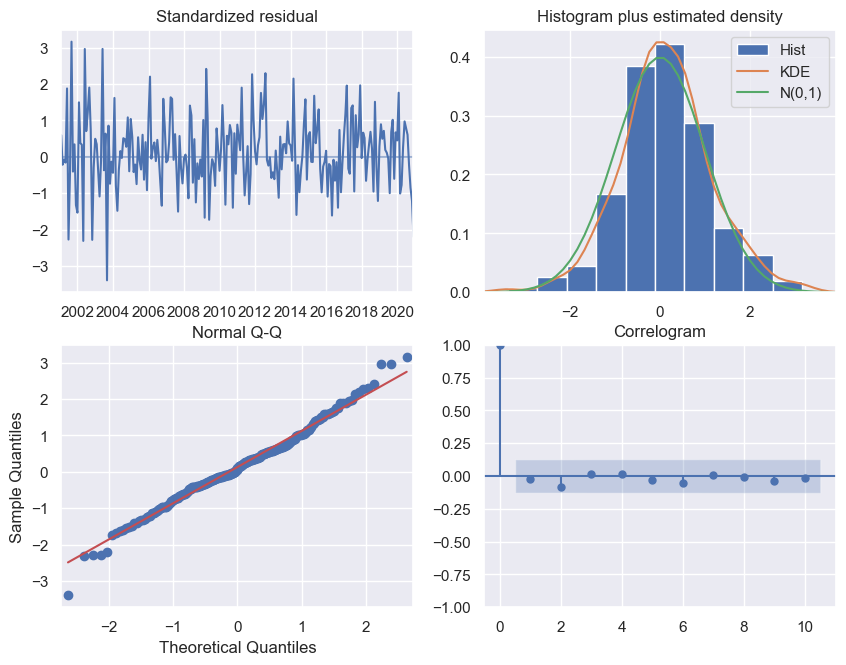

In [203]:
results.plot_diagnostics(figsize=(10,7.5))
plt.show()

In [204]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  252
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -853.819
Date:                              Mon, 01 Jan 2024   AIC                           1715.638
Time:                                      11:16:48   BIC                           1729.544
Sample:                                  01-01-2000   HQIC                          1721.242
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7841      0.067    -11.708      0.000      -0.915      -0.653
ma.L2         -0.1202      0.067     -1.787      0.074      -0.252       0.012
ma.S.L12      -0.7491      0.063    -11.833      0.000      -0.873      -0.625
sigma2        70.5616      5.702     12.375      0.000      59.386      81.737
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.74   Prob(JB):                         0.05
Heteroskedasticity (H):               0.60   Skew:                             0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [205]:
#Prob(JB) is just at the edge indicating that the residuals are not normally distributed. although my guess is that the outliers from the Q-Q curve are responsible. One could eliminate the outliers and retrain the model. 

In [206]:
sarima  = SARIMAX(df_train, order=(0,1,2), seasonal_order=(0,1,1,12))

C:\Users\l_san\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\l_san\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [207]:
results= sarima.fit()

In [208]:
np.mean(np.absolute(results.resid))

7.65973119489923

In [209]:
train_pred= results.get_prediction(start=-25)
#one step ahead predictions on training set

In [210]:
mean_train_pred = train_pred.predicted_mean

In [211]:
conf_int_train= train_pred.conf_int()

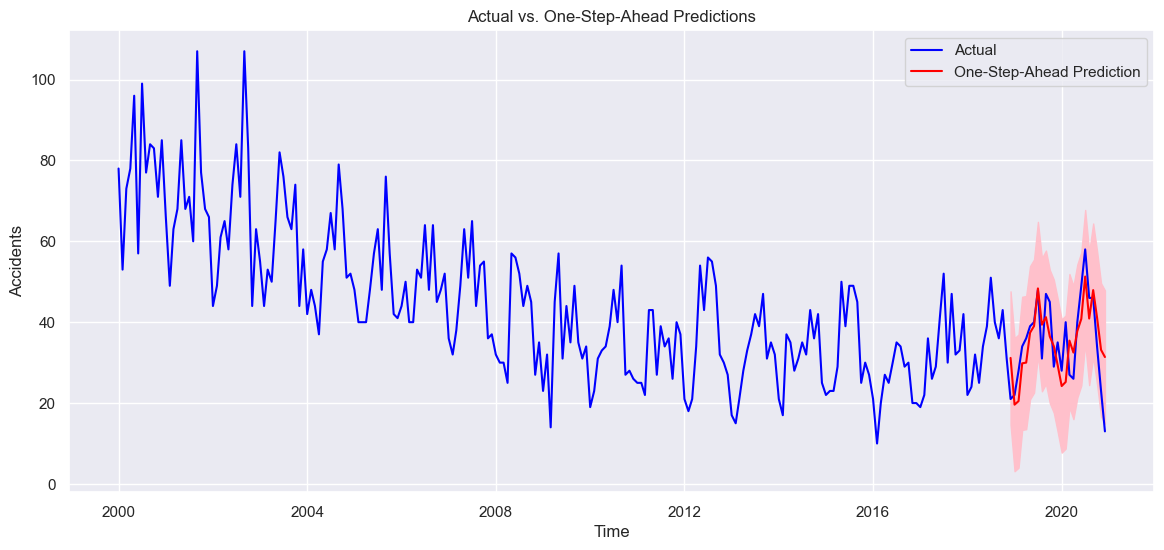

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_train.index, df_train, label='Actual', color='blue')
plt.plot(mean_train_pred.index, mean_train_pred.values, label='One-Step-Ahead Prediction', color='red')
plt.fill_between(mean_train_pred.index, conf_int_train['lower WERT'], conf_int_train['upper WERT'], color='pink')
plt.xlabel('Time')
plt.ylabel('Accidents') 
plt.legend()
plt.title('Actual vs. One-Step-Ahead Predictions')
plt.grid(True)

plt.show()


In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [214]:
test_pred = results.get_forecast(steps=12)

In [215]:
mean_pred_test = test_pred.predicted_mean

In [216]:
conf_int_test = test_pred.conf_int()

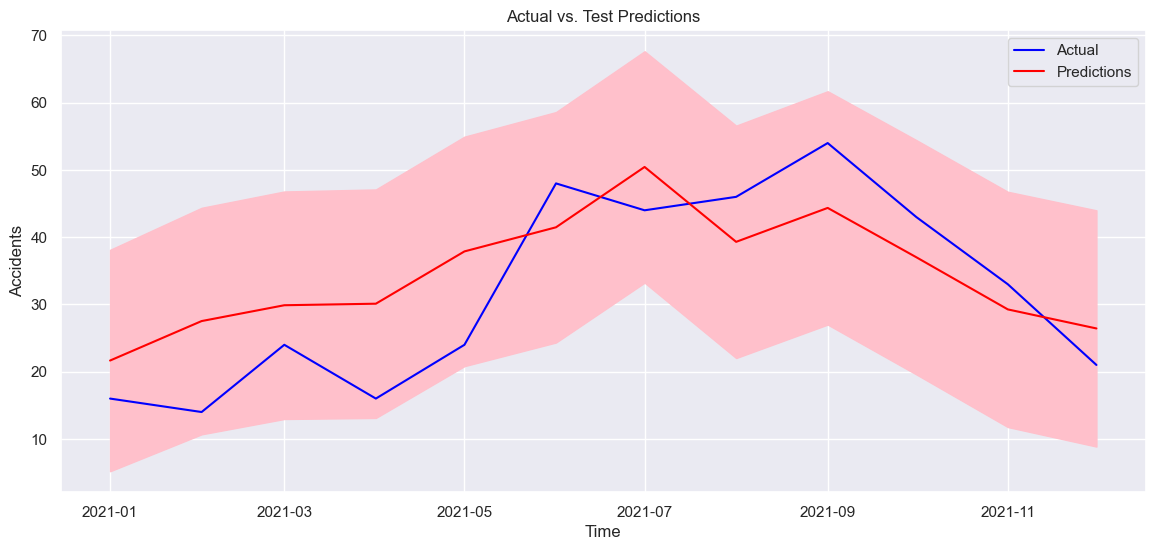

In [217]:
plt.figure(figsize=(14, 6))
plt.plot(df_test.index, df_test, label='Actual', color='blue')
plt.plot(mean_pred_test.index, mean_pred_test.values, label='Predictions', color='red')
plt.fill_between(mean_pred_test.index, conf_int_test['lower WERT'], conf_int_test['upper WERT'], color='pink')
plt.xlabel('Time')
plt.ylabel('Accidents') 
plt.legend()
plt.title('Actual vs. Test Predictions')
plt.grid(True)

plt.show()

In [218]:
mse_test= mean_squared_error(df_test, mean_pred_test)
mse_test

78.55191412366837

In [219]:
mae_test = mean_absolute_error(df_test, mean_pred_test)
mae_test

8.12636708659989

In [220]:
import joblib
joblib.dump(results, 'sarima.pkl')

['sarima.pkl']

In [221]:
np.savetxt("test_point.csv", df_test.index, delimiter=',' , fmt='%d')

In [222]:
with open("test_point.csv", "r") as f:
    test = np.loadtxt(f, delimiter=',')

In [223]:
print(test)

[1.6094592e+18 1.6121376e+18 1.6145568e+18 1.6172352e+18 1.6198272e+18
 1.6225056e+18 1.6250976e+18 1.6277760e+18 1.6304544e+18 1.6330464e+18
 1.6357248e+18 1.6383168e+18]


In [224]:
bt1= joblib.load('sarima.pkl')

In [225]:
def predict_for_date(year, month, model=results, data=df_train):
    target_date = pd.Timestamp(year=year, month=month, day=1)
    last_known_date = data.index[-1]
    
    months_diff = (target_date.year - last_known_date.year) * 12 + target_date.month - last_known_date.month
    if months_diff > 0:
        prediction = model.get_forecast(steps=months_diff).predicted_mean.iloc[-1]
    else:
        prediction = data.loc[target_date.strftime('%Y-%m-%d')] if target_date in data.index else None
    
    return prediction


In [226]:
year = 2021
month = 1
predict_for_date(year, month)


21.65662600565763

In [227]:
test_dates = pd.to_datetime(test, unit='ns')

predictions = []

for test_date in test_dates:
    year = test_date.year
    month = test_date.month
    prediction = predict_for_date(year, month)
    predictions.append(prediction)


In [228]:
predictions

[21.65662600565763,
 27.526967665257093,
 29.881307584730287,
 30.10940912209397,
 37.886425267469605,
 41.47189513204995,
 50.44452295166007,
 39.3085371625554,
 44.3549377830934,
 37.02108979084006,
 29.261148550377385,
 26.42875486124622]

In [229]:
df_train.index[-1]

Timestamp('2020-12-01 00:00:00')

In [230]:
df_train.to_csv('df_train.csv')